ЗАДАНИЕ 1

In [6]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

crabs = fetch_openml(name='prnn_crabs', as_frame=True, parser='auto')

print(crabs.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Datasets for `Pattern Recognition and Neural Networks' by B.D. Ripley

Cambridge University Press (1996)  ISBN  0-521-46086-7

The background to the datasets is described in section 1.4; this file
relates the computer-readable files to that description.



Cushing's syndrome
------------------

Data from Aitchison & Dunsmore (1975, Tables 11.1-3).

Data file Cushings.dat has four columns,

Label of the patient
Tetrhydrocortisone  (mg/24hr)
Pregnanetriol  (mg/24hr)
Type

The type of the last six patients (u1 to u6) should be
regarded as unknown.  (The code `o' indicates `other').



synthetic two-class problem
---------------------------

Data from Ripley (1994a).

This has two real-valued co-ordinates (xs and ys) and a class (xc)
which is 0 or 1.

Data file  synth.tr   has 250 rows of the training set
synth.te   has 1000 rows of the test set  (not used here)



viruses
-------

This is a dataset on 61 viruses with

бизнесзадача: определении пола раков по их физическим характеристикам
Задача классификации: предсказать пол рака (male/female) на основе его физических характеристик (FL, RW, CL, CW, BD)
Тип задачи: бинарная классификация так как мы предсказываем один из двух возможных классов для каждого объекта


ЗАДАНИЕ 2

In [30]:
df = crabs.frame
print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)

Размер датасета: (200, 7)

Типы данных:
sp     category
sex      object
FL      float64
RW      float64
CL      float64
CW      float64
BD      float64
dtype: object


In [31]:
numerical_features = ['FL', 'RW', 'CL', 'CW', 'BD']
print("\nОсновные статистики числовых признаков:")
print(df[numerical_features].describe().round(2))


Основные статистики числовых признаков:
           FL      RW      CL      CW      BD
count  200.00  200.00  200.00  200.00  200.00
mean    15.58   12.74   32.11   36.41   14.03
std      3.50    2.57    7.12    7.87    3.42
min      7.20    6.50   14.70   17.10    6.10
25%     12.90   11.00   27.28   31.50   11.40
50%     15.55   12.80   32.10   36.80   13.90
75%     18.05   14.30   37.22   42.00   16.60
max     23.10   20.20   47.60   54.60   21.60


Все числовые признаки измеряются в миллиметрах 


Распределение целевой переменной (пола):
Male      50.0
Female    50.0
Name: sex, dtype: float64


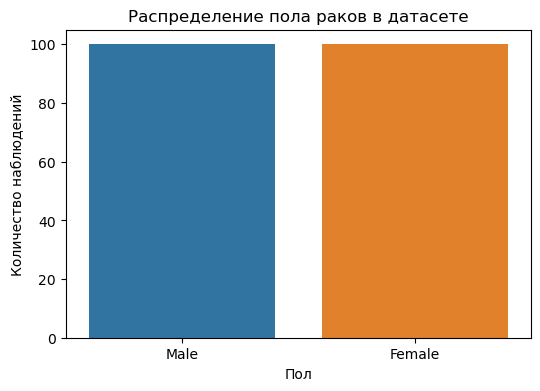

In [32]:
target_dist = df['sex'].value_counts(normalize=True) * 100
print("\nРаспределение целевой переменной (пола):")
print(target_dist)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', order=target_dist.index)
plt.title('Распределение пола раков в датасете')
plt.xlabel('Пол')
plt.ylabel('Количество наблюдений')
plt.show()

Датсет идеально сбалансирован по целевой переменной

In [33]:
# Проверка на пропущенные значения
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Количество пропущенных значений:
sp     0
sex    0
FL     0
RW     0
CL     0
CW     0
BD     0
dtype: int64


ЗАДАНИЕ 3

In [34]:
# Проверяем наличие пропусков
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
sp     0
sex    0
FL     0
RW     0
CL     0
CW     0
BD     0
dtype: int64


In [35]:
# Проверяем типы данных
print("\nТипы данных в датасете:")
print(df.dtypes)


Типы данных в датасете:
sp     category
sex      object
FL      float64
RW      float64
CL      float64
CW      float64
BD      float64
dtype: object


In [39]:
df['sp'] = df['sp'].cat.codes
#переделываем категориальный столбец sp в числовые значения

AttributeError: Can only use .cat accessor with a 'category' dtype

In [42]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
#male, female меняем на 0 и 1 соответсвенно

In [45]:
print(df.dtypes)

sp        int8
sex      int64
FL     float64
RW     float64
CL     float64
CW     float64
BD     float64
dtype: object


ЗАДАНИЕ 4

In [46]:
X = df.drop('sex', axis=1)  # Все признаки, кроме пола
y = df['sex']  # Целевая переменная (пол)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Оценка качества модели
score = model.score(X_test, y_test)
print(f"Результат оценки модели: {score:.4f}")


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Результат оценки модели: 0.9500
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.93      1.00      0.96        25

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.95        40
weighted avg       0.95      0.95      0.95        40



accurac 95%, что означает, что модель корректно предсказывает пол раков в 95% случаев, это говорит о хорошем качестве модели
precision показывает, что 100% и 93% особей предсказываются правильно
recall правильно идентифицировал 87% мужских особей и 100% женских 
Модель лучше предсказывает женские особи, но имеет небольшой компромисс в точности для мужских
Macro avg показывает, что модель хорошо работает на обоих классах
Weighted avg подтверждает, что модель сохраняет высокое качество

ЗАДАНИЕ 5

In [49]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности класса 1 (female)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")
#roc-auc показывает, насколько хорошо модель разделяет 2 класса

ROC-AUC: 0.9947


In [50]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9615


In [51]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc:.4f}")
#коэффициент корелляции между реальными и предсказанными классами

MCC: 0.8958


In [53]:
from sklearn.metrics import confusion_matrixч
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

Матрица ошибок:
[[13  2]
 [ 0 25]]


1.ROC-AUC подтверждает, что модель отлично разделяет классы
2.F1-Score показывает высокую сбалансированность precision и recall
3.MCC указывает на сильную корреляцию между предсказаниями и реальными данными

ЗАДАНИЕ 6

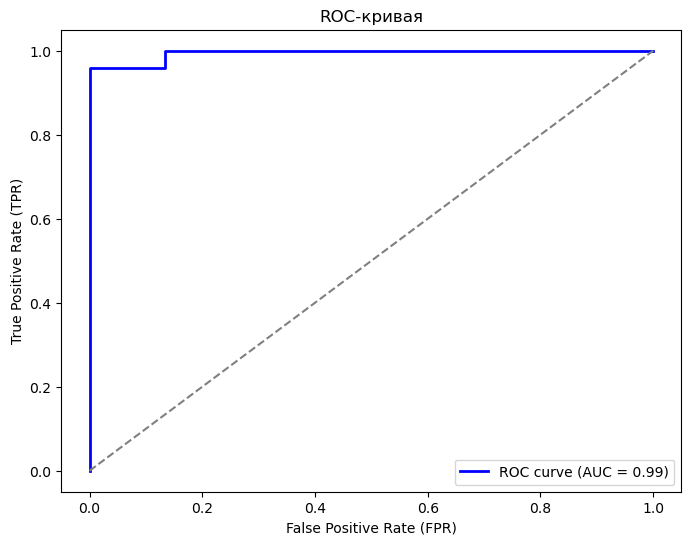

ROC-AUC: 0.9947


In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Получаем вероятности для класса 1 (female)
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисляем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Строим график ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.show()

print(f"ROC-AUC: {roc_auc:.4f}")

Синяя линия проходит близко к верхнему левому углу, что указывает на высокую производительность модели.
Площадь под кривой (AUC) = 0.9947
Почти идеальное разделение классов

In [57]:
# Находим оптимальный порог
import numpy as np
#его можно посчитать через формулу юдена, при которой мы ищем максимальную разницу между пользой и вредом
youden_idx = tpr - fpr
optimal_threshold_idx = np.argmax(youden_idx)
optimal_threshold = thresholds[optimal_threshold_idx]
print(f"Оптимальный порог: {optimal_threshold:.4f}")

Оптимальный порог: 0.7038


In [58]:
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Новый отчёт классификации
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        25

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



ЗАДАНИЕ 7

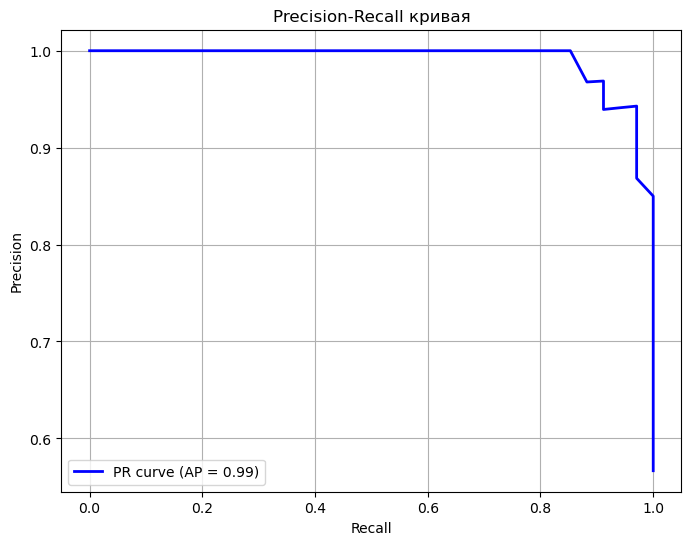

PR-AUC (Average Precision): 0.9903


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) 

#Получение вероятностей для класса 1
y_prob = model.predict_proba(X_test)[:, 1] 

#Вычисление метрик
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend()
plt.grid()
plt.show()

print(f"PR-AUC (Average Precision): {pr_auc:.4f}")

PR-кривая почти идеально стремится к точке (1.0, 1.0) в верхнем правом углу, что указывает на выдающееся качество модели,
Average Precision = 0.997 - модель почти безошибочно разделяет классы
Почти все предсказанные женские особи действительно являются женскими

In [63]:
# F1-Score для всех порогов (исключаем последний элемент, так как thresholds на 1 меньше)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]  

print(f"Оптимальный порог (F1-Score): {optimal_threshold:.4f}")
print(f"F1-Score при этом пороге: {f1_scores[optimal_idx]:.4f}")

Оптимальный порог (F1-Score): 0.7038
F1-Score при этом пороге: 0.9796


In [64]:
from sklearn.metrics import classification_report

# Предсказание с оптимальным порогом
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)  # Используем optimal_threshold

# Отчёт классификации
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        25

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



ЗАДАНИЕ 8


In [67]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

crabs = fetch_openml(name='prnn_crabs', as_frame=True, parser='auto')
df = crabs.frame

df['sp'] = df['sp'].cat.codes
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

X = df.drop('sex', axis=1)
y = df['sex']

In [68]:
# Инициализация модели и стратегии кросс-валидации
model = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Оценка модели с кросс-валидацией
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Accuracy для каждого фолда:", scores)
print("Средняя точность (CV):", np.mean(scores).round(4))

Accuracy для каждого фолда: [0.825 0.9   0.925 0.925 0.925]
Средняя точность (CV): 0.9


ЗАДАНИЕ 9

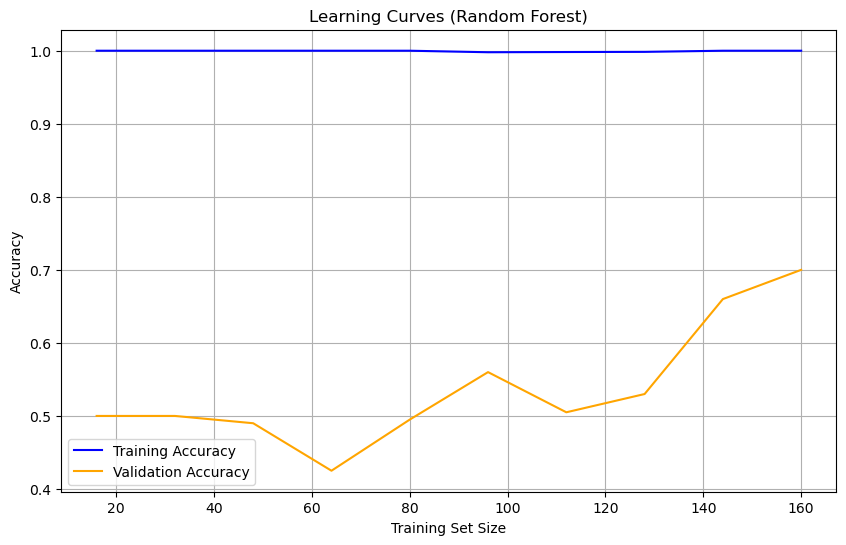

In [83]:
# Создание модели
from sklearn.model_selection import learning_curve
model = RandomForestClassifier(random_state=52)

# Вычисление данных для кривых обучения
train_sizes, train_scores, val_scores = learning_curve()
    estimator=model,
    X=X,
    y=y,
    cv=5,  
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 точек от 10% до 100% данных
    n_jobs=-1
)

# Усреднение результатов по фолдам
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Random Forest)')
plt.legend()
plt.grid() 
plt.show()

Модель изначально сильно переобучалась, но с ростом данных демонстрирует улучшение обобщающей способности, чемм больше размер выборки, тем меньше модель будет переобучена

ЗАДАНИЕ 10

In [84]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

crabs = fetch_openml(name='prnn_crabs', as_frame=True, parser='auto')
df = crabs.frame
df['sp'] = df['sp'].cat.codes
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
X = df.drop('sex', axis=1)
y = df['sex']

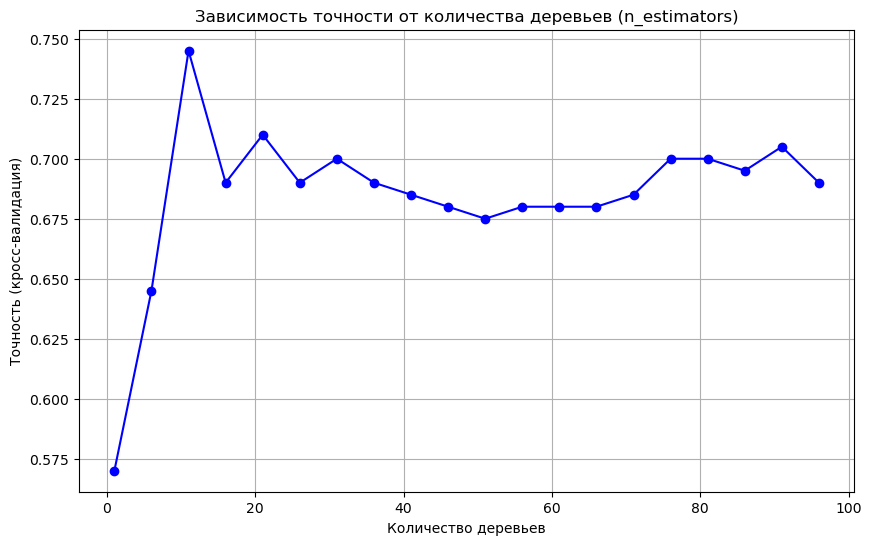

Оптимальное количество деревьев: 11 (точность = 0.7450)


In [87]:
#n_estimators — количество деревьев в RandomForestClassifier,здесь проверяем, как точность модели зависит от их числа.
n_estimators_range = range(1, 101, 5) 
cv_scores = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=52)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от количества деревьев (n_estimators)')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность (кросс-валидация)')
plt.grid(True)
plt.show()

# Оптимальное значение
optimal_n = n_estimators_range[np.argmax(cv_scores)]
print(f"Оптимальное количество деревьев: {optimal_n} (точность = {max(cv_scores):.4f})")

Максимальная точность достигается при 11 деревьях и составляет 0.7450, это значит, что для данного набора данных использование бОльшего количества деревьев неоправданно,так как лишь увеличиваются вычислительные затраты на время обучения и предсказания модели